In [10]:
from qm9_masked import QM9Dataset, RemoveYTransform, SelectMuTransform
from src.datasets.mose_masked import MoseDataset
import torch_geometric as pyg
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
import torch
reduction_args = {
                  'reduction_type':'custom',
                  'reduce_frac':1, 
                  'disturb_frac':0.,
                  'max_condense_size':6,
                  'min_condense_size':2,
               }
arg_string = '_'.join([f'[{key}:{val}]' for (key,val) in reduction_args.items()])

In [12]:

dataset = MoseDataset(stage='test', root='/data2/chensm22/HRS/data/moses/moses_pyg', 
                                    graph_type='coarsed',
                                    transform=None,
                                    remove_h=False,
                                    reduction_args=reduction_args
                                    )
# dataset = MoseDataset(stage='val', root='/data2/chensm22/HRS/data/moses/moses_pyg', 
#                                     graph_type='coarsed',
#                                     transform=None,
#                                     remove_h=False,
#                                     reduction_args=reduction_args
#                                     )
# [reduction_type:custom]_[reduce_frac:1]_[disturb_frac:0.0]_[max_condense_size:6]_[min_condense_size:2]

In [ ]:
/data2/chensm22/HRS/data/moses/moses_pyg/processed/coarsed_distribution_[reduction_type:custom]_[reduce_frac:1]_[disturb_frac:0.0]_[max_condense_size:6]_[min_condense_size:2].pt
/data2/chensm22/HRS/data/moses/moses_pyg/processed/coarsed_distribution_[reduction_type:custom]_[reduce_frac:1.0]_[disturb_frac:0.0]_[max_condense_size:6]_[min_condense_size:2].pt
example_data = dataset[0]
# example_data.x.argmax(-1)
example_data

Data(x=[13, 19], edge_index=[2, 28], edge_attr=[28, 2], y=[1, 0], x_aug=[13, 6], dtype=torch.float32)

In [4]:
example_data = dataset[-15]
example_data.x = example_data.x.argmax(-1)
G = to_networkx(example_data, node_attrs=['x'])
G.nodes(data=True)

NodeDataView({0: {'x': 1}, 1: {'x': 7}, 2: {'x': 1}, 3: {'x': 0}, 4: {'x': 0}, 5: {'x': 0}, 6: {'x': 0}, 7: {'x': 0}, 8: {'x': 0}, 9: {'x': 0}, 10: {'x': 0}, 11: {'x': 0}, 12: {'x': 0}, 13: {'x': 0}, 14: {'x': 0}})

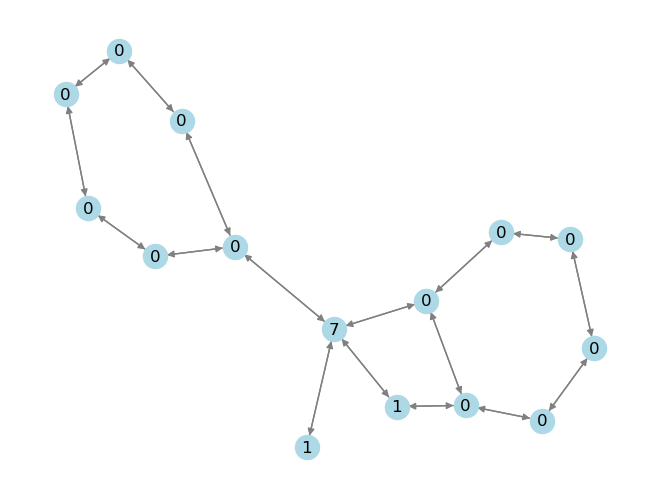

In [5]:
pos = nx.spring_layout(G)

# 绘制节点和边
nx.draw(G, pos, with_labels=False, node_color='lightblue', edge_color='gray')

# 获取节点的 'x' 属性并作为标签
labels = {node: G.nodes[node]['x'] for node in G.nodes}

# 绘制节点标签
nx.draw_networkx_labels(G, pos, labels=labels)

# 显示图
plt.show()

In [6]:
import torch
torch.load(f'/data2/chensm22/HRS/data/moses/moses_pyg/processed/expanded_distribution_{arg_string}.pt')

/tmp/ipykernel_29077/1093747132.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f'/data2/chensm22/HRS/data/moses/moses_pyg/processed/expanded_distribution_{ar

(tensor([[7.6305e-01, 1.1004e-01, 1.6208e-02, 7.4025e-02, 2.7034e-02, 7.5570e-03,
          2.0872e-03],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [6.9646e-01, 1.3172e-01, 1.6459e-02, 1.3855e-01, 9.1898e-03, 5.8681e-03,
          1.7526e-03],
         [6.9225e-01, 1.8718e-01, 1.6894e-02, 1.0093e-01, 1.1844e-03, 1.3133e-03,
          2.5593e-04],
         [7.0426e-01, 2.0331e-01, 1.4528e-02, 7.6710e-02, 6.3479e-04, 4.8386e-04,
          6.8362e-05],
         [7.0408e-01, 2.3044e-01, 1.3508e-02, 5.1719e-02, 9.5129e-05, 1.5855e-04,
          0.0000e+00],
         [7.0000e-01, 2.2381e-01, 1.4286e-02, 6.1905e-02, 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [8.1250e-01, 1.2500e-01, 0.0000e+00, 6.2500e-02, 0.0000e+00, 0.0000e+00,
          0.0000e+00]]),
 tensor([[0.0000e+00, 4.0229e-01, 4.4310e-02, 1.4271e-03, 5.5198e-01],
         [8.7577e-01, 5.5541e-02, 2.4019e-04, 5.5132e-06, 6.8443e-02],
         [6.8782

In [7]:
graph,node,ring,edge = torch.load(f'/data2/chensm22/HRS/data/moses/moses_pyg/processed/coarsed_distribution_{arg_string}.pt')
node.shape
# ring

/tmp/ipykernel_29077/3003747076.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  graph,node,ring,edge = torch.load(f'/data2/chensm22/HRS/data/moses/moses_pyg/processed/co

torch.Size([19])